In [5]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [6]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [7]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [8]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [9]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.2,300,0)

Vizualize data

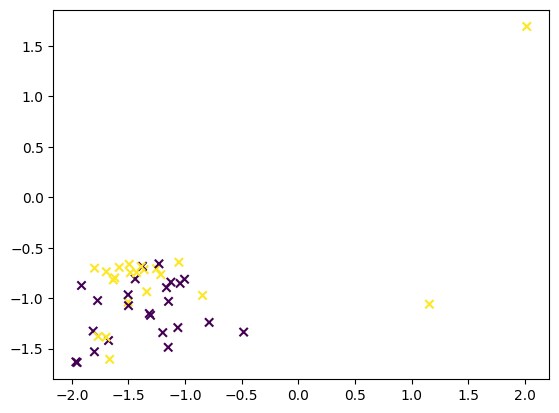

In [10]:
csp = CSP(n_components=12, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(60,90).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [11]:
csp_test_classifiers(4,time_config, 18, 7)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
2/2 [==============================] - 1s 9ms/step - loss: 0.2523 - accuracy: 0.5278
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.5556
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.5556
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2434 - accuracy: 0.5556
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2406 - accuracy: 0.5556
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2380 - accuracy: 0.5556
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2354 - accuracy: 0.5556
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2329 - accuracy: 0.5833
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2303 - accuracy: 0.6389
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2277 - accuracy: 0.6389
Epoch 11/15
2/2 [======================

1/1 [==============================] - 0s 131ms/step - loss: 0.2022 - accuracy: 0.6667
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3777 - accuracy: 0.3611
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.3611
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3663 - accuracy: 0.3611
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3608 - accuracy: 0.3611
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3556 - accuracy: 0.3611
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.3611
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3455 - accuracy: 0.3889
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3408 - accuracy: 0.3889
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3362 - accuracy: 0.3889
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.3675 - accuracy: 0.3056
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.3351 - accuracy: 0.4444
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.5517 - accuracy: 0.0833
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.5469 - accuracy: 0.0556
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.5423 - accuracy: 0.0556
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.5380 - accuracy: 0.0556
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.5336 - accuracy: 0.0556
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.5294 - accuracy: 0.0556
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.5251 - accuracy: 0.0556
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.5206 - accuracy: 0.0556
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.3856 - accuracy: 0.4444
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3810 - accuracy: 0.4444
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3764 - accuracy: 0.4444
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3717 - accuracy: 0.4444
Epoch 7/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3668 - accuracy: 0.4444
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3622 - accuracy: 0.4444
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3574 - accuracy: 0.4444
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3520 - accuracy: 0.4444
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3472 - accuracy: 0.4444
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3421 - accuracy: 0.4444
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.1936 - accuracy: 0.8333
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1917 - accuracy: 0.8333
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1896 - accuracy: 0.8333
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1876 - accuracy: 0.8333
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1857 - accuracy: 0.8333
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1837 - accuracy: 0.8333
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1820 - accuracy: 0.8333
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.1861 - accuracy: 0.6667
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3229 - accuracy: 0.3333
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3186 - accuracy: 0.3611
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2444 - accuracy: 0.5556
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2421 - accuracy: 0.5556
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2491 - accuracy: 0.7778
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2263 - accuracy: 0.6667
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2227 - accuracy: 0.6667
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2196 - accuracy: 0.6667
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2165 - accuracy: 0.6667
Epoch 5/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2136 - accuracy: 0.6667
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2108 - accuracy: 0.6667
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2079 - accuracy: 0.6667
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.3379 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3352 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3325 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3298 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3271 - accuracy: 0.5278
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3243 - accuracy: 0.5278
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3217 - accuracy: 0.5278
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3191 - accuracy: 0.5278
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3164 - accuracy: 0.5278
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3135 - accuracy: 0.5278
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.1452 - accuracy: 0.8333
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1436 - accuracy: 0.8333
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1417 - accuracy: 0.8611
Epoch 10/15
2/2 [==============================] - 0s 8ms/step - loss: 0.1399 - accuracy: 0.8611
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1382 - accuracy: 0.8611
Epoch 12/15
2/2 [==============================] - 0s 9ms/step - loss: 0.1363 - accuracy: 0.8611
Epoch 13/15
2/2 [==============================] - 0s 7ms/step - loss: 0.1348 - accuracy: 0.8611
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1331 - accuracy: 0.8611
Epoch 15/15
1/1 [==============================] - 0s 165ms/step - loss: 0.3604 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.1950 - accuracy: 0.7500
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.1426 - accuracy: 0.8333
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1406 - accuracy: 0.8333
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1387 - accuracy: 0.8611
Epoch 15/15
1/1 [==============================] - 0s 130ms/step - loss: 0.2730 - accuracy: 0.5556
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2220 - accuracy: 0.6944
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2195 - accuracy: 0.7222
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2171 - accuracy: 0.7222
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2149 - accuracy: 0.7222
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2128 - accuracy: 0.7222
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2108 - accuracy: 0.7222
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 4ms/step - loss: 0.1786 - accuracy: 0.7500
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1755 - accuracy: 0.7500
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1729 - accuracy: 0.7500
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1704 - accuracy: 0.7500
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1679 - accuracy: 0.7500
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1654 - accuracy: 0.7500
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1630 - accuracy: 0.7500
Epoch 8/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1605 - accuracy: 0.7500
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1581 - accuracy: 0.7500
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1557 - accuracy: 0.7778
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 7ms/step - loss: 0.3795 - accuracy: 0.2778
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3752 - accuracy: 0.2778
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3710 - accuracy: 0.2778
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3666 - accuracy: 0.2778
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3625 - accuracy: 0.2778
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3580 - accuracy: 0.2778
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3538 - accuracy: 0.3333
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3497 - accuracy: 0.3333
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3454 - accuracy: 0.3333
Epoch 15/15
1/1 [==============================] - 0s 129ms/step - loss: 0.2623 - accuracy: 0.4444
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.1798 - accuracy: 0.7222
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1775 - accuracy: 0.7500
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1753 - accuracy: 0.7500
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1731 - accuracy: 0.7500
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.1947 - accuracy: 0.6667
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2140 - accuracy: 0.6667
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2115 - accuracy: 0.6667
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2091 - accuracy: 0.6667
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2068 - accuracy: 0.6667
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2046 - accuracy: 0.6667
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 129ms/step - loss: 0.2893 - accuracy: 0.4444
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.1827 - accuracy: 0.7222
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1807 - accuracy: 0.8333
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1789 - accuracy: 0.8333
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1772 - accuracy: 0.8333
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1754 - accuracy: 0.8333
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.8333
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1718 - accuracy: 0.8333
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1700 - accuracy: 0.8611
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1684 - accuracy: 0.8611
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.1563 - accuracy: 0.8889
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1546 - accuracy: 0.8889
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1530 - accuracy: 0.8889
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1514 - accuracy: 0.8889
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1498 - accuracy: 0.8889
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.8889
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1469 - accuracy: 0.9167
Epoch 12/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1454 - accuracy: 0.9167
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1441 - accuracy: 0.9167
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1428 - accuracy: 0.9444
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2715 - accuracy: 0.4167
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2685 - accuracy: 0.4167
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2656 - accuracy: 0.4167
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2627 - accuracy: 0.4444
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2598 - accuracy: 0.4722
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2462 - accuracy: 0.4444
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2755 - accuracy: 0.6111
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.6111
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2668 - accuracy: 0.6389
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.6389
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 117ms/step - loss: 0.4158 - accuracy: 0.4444
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.4458 - accuracy: 0.3056
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4389 - accuracy: 0.3056
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4320 - accuracy: 0.3056
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4258 - accuracy: 0.3056
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4194 - accuracy: 0.3056
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.3056
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4069 - accuracy: 0.3056
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4006 - accuracy: 0.3056
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.3056
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2753 - accuracy: 0.6111
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2723 - accuracy: 0.6111
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2692 - accuracy: 0.6111
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2662 - accuracy: 0.6111
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2633 - accuracy: 0.6111
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.6111
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2574 - accuracy: 0.6389
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.6389
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2516 - accuracy: 0.6389
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.6389
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2810 - accuracy: 0.5833
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2782 - accuracy: 0.5833
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2755 - accuracy: 0.5833
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2727 - accuracy: 0.6111
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2699 - accuracy: 0.6111
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2671 - accuracy: 0.6111
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.3778 - accuracy: 0.3333
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2919 - accuracy: 0.5278
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2882 - accuracy: 0.5278
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2849 - accuracy: 0.5278
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.4444
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.3643 - accuracy: 0.2222
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2477 - accuracy: 0.5833
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.5833
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2377 - accuracy: 0.6111
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2330 - accuracy: 0.6389
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2283 - accuracy: 0.6667
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.7222
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2195 - accuracy: 0.7500
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2153 - accuracy: 0.7778
Epoch 9/15
2/2 [==============================] 

In [12]:
dwt_test_classifiers(1,'db2',time_config)

Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2721 - accuracy: 0.5556
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2692 - accuracy: 0.5556
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2667 - accuracy: 0.5556
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2645 - accuracy: 0.5556
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2624 - accuracy: 0.5556
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.5833
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.5833
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2559 - accuracy: 0.5833
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2539 - accuracy: 0.5833
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2514 - accuracy: 0.5833
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 5ms/step - loss: 0.3082 - accuracy: 0.4722
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3061 - accuracy: 0.4722
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3042 - accuracy: 0.4722
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3022 - accuracy: 0.4722
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.4722
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.4722
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2968 - accuracy: 0.4722
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2951 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2934 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2890 - accuracy: 0.4444
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2276 - accuracy: 0.6389
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2260 - accuracy: 0.6389
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2244 - accuracy: 0.6389
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2229 - accuracy: 0.6389
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.1895 - accuracy: 0.7778
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2498 - accuracy: 0.5833
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2470 - accuracy: 0.5833
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2449 - accuracy: 0.5833
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2430 - accuracy: 0.5833
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2411 - accuracy: 0.6111
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 123ms/step - loss: 0.3365 - accuracy: 0.3333
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3464 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3424 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3392 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3358 - accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3332 - accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3300 - accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3272 - accuracy: 0.5000
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3241 - accuracy: 0.5000
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3215 - accuracy: 0.5000
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2871 - accuracy: 0.5833
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2853 - accuracy: 0.5833
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2834 - accuracy: 0.5833
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2816 - accuracy: 0.5833
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2799 - accuracy: 0.5833
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2782 - accuracy: 0.5833
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2764 - accuracy: 0.5833
Epoch 12/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2746 - accuracy: 0.6111
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2728 - accuracy: 0.6111
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2710 - accuracy: 0.6111
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2263 - accuracy: 0.6667
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2246 - accuracy: 0.6944
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 0.6944
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2209 - accuracy: 0.6944
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2192 - accuracy: 0.6944
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2462 - accuracy: 0.6667
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2756 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2730 - accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2711 - accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2693 - accuracy: 0.5000
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 112ms/step - loss: 0.2405 - accuracy: 0.6667
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2987 - accuracy: 0.5278
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2963 - accuracy: 0.5278
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2946 - accuracy: 0.5278
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2928 - accuracy: 0.5278
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2912 - accuracy: 0.5278
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2896 - accuracy: 0.5278
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2881 - accuracy: 0.5278
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2867 - accuracy: 0.5278
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2852 - accuracy: 0.5278
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2890 - accuracy: 0.5833
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2872 - accuracy: 0.5833
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2854 - accuracy: 0.6111
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2839 - accuracy: 0.6111
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2821 - accuracy: 0.6111
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2806 - accuracy: 0.6111
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2790 - accuracy: 0.6111
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2773 - accuracy: 0.6111
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2759 - accuracy: 0.6111
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2743 - accuracy: 0.6111
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2855 - accuracy: 0.4444
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2831 - accuracy: 0.4722
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2809 - accuracy: 0.4722
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2785 - accuracy: 0.4722
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2762 - accuracy: 0.4722
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2740 - accuracy: 0.4722
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.3272 - accuracy: 0.2222
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3437 - accuracy: 0.3889
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3398 - accuracy: 0.3611
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3369 - accuracy: 0.3611
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2237 - accuracy: 0.6111
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.2452 - accuracy: 0.6667
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2693 - accuracy: 0.5278
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2670 - accuracy: 0.5278
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2650 - accuracy: 0.5278
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2630 - accuracy: 0.5278
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2614 - accuracy: 0.5278
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2598 - accuracy: 0.5278
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2583 - accuracy: 0.5278
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2567 - accuracy: 0.5278
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2568 - accuracy: 0.6389
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2545 - accuracy: 0.6389
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.6389
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2502 - accuracy: 0.6389
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2482 - accuracy: 0.6389
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.6389
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2441 - accuracy: 0.6389
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2422 - accuracy: 0.6389
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.6389
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2386 - accuracy: 0.6389
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2653 - accuracy: 0.5833
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2631 - accuracy: 0.6111
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2607 - accuracy: 0.6111
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2586 - accuracy: 0.6111
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2564 - accuracy: 0.6111
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2542 - accuracy: 0.6389
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2522 - accuracy: 0.6389
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.2474 - accuracy: 0.6667
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3610 - accuracy: 0.4444
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3581 - accuracy: 0.4444
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2726 - accuracy: 0.5000
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2710 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2691 - accuracy: 0.4444
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2631 - accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2610 - accuracy: 0.5556
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2594 - accuracy: 0.5556
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2578 - accuracy: 0.5556
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2563 - accuracy: 0.5556
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2549 - accuracy: 0.5556
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2534 - accuracy: 0.5556
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 0.3241 - accuracy: 0.5556
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3219 - accuracy: 0.5556
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3199 - accuracy: 0.5556
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3180 - accuracy: 0.5556
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.5556
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3144 - accuracy: 0.5556
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3128 - accuracy: 0.5556
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3111 - accuracy: 0.5556
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3095 - accuracy: 0.5556
Epoch 11/15
2/2 [==============================] - 0s 7ms/step - loss: 0.3077 - accuracy: 0.5556
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2880 - accuracy: 0.5833
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2865 - accuracy: 0.5833
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2848 - accuracy: 0.5833
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2833 - accuracy: 0.5833
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2817 - accuracy: 0.5833
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2802 - accuracy: 0.5833
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2788 - accuracy: 0.5833
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2771 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 112ms/step - loss: 0.4479 - accuracy: 0.4444
Epoch 1/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3472 - accuracy: 0.5000
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3813 - accuracy: 0.4167
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3793 - accuracy: 0.4167
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3773 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.3941 - accuracy: 0.1111
Epoch 1/15
2/2 [==============================] - 1s 6ms/step - loss: 0.2455 - accuracy: 0.5833
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2422 - accuracy: 0.5833
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2397 - accuracy: 0.6111
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2373 - accuracy: 0.6111
Epoch 5/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2352 - accuracy: 0.6111
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2330 - accuracy: 0.6389
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 4ms/step - loss: 0.2636 - accuracy: 0.5556
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2614 - accuracy: 0.5833
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2600 - accuracy: 0.5833
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2586 - accuracy: 0.5833
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2571 - accuracy: 0.5833
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2557 - accuracy: 0.5833
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2543 - accuracy: 0.6111
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2529 - accuracy: 0.6111
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2516 - accuracy: 0.6111
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2503 - accuracy: 0.6111
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 4ms/step - loss: 0.2297 - accuracy: 0.6111
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2275 - accuracy: 0.6111
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2253 - accuracy: 0.6389
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2234 - accuracy: 0.6389
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2212 - accuracy: 0.6389
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2192 - accuracy: 0.6389
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2173 - accuracy: 0.6389
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2153 - accuracy: 0.6389
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2132 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2077 - accuracy: 0.6667
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2285 - accuracy: 0.6389
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2273 - accuracy: 0.6389
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2261 - accuracy: 0.6667
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2249 - accuracy: 0.6944
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2518 - accuracy: 0.6667
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2507 - accuracy: 0.5833
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.5833
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2471 - accuracy: 0.5833
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2455 - accuracy: 0.5833
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2441 - accuracy: 0.5833
Epoch 6/15
2/2 [=============================

left vs right

In [21]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (1,0.2,1000,0)

In [22]:
csp_test_classifiers(10,time_config, 35, 18)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2197 - accuracy: 0.5897
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2164 - accuracy: 0.5897
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2135 - accuracy: 0.5897
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2108 - accuracy: 0.5897
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2083 - accuracy: 0.5897
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2058 - accuracy: 0.5897
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2035 - accuracy: 0.6410
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2012 - accuracy: 0.6667
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1990 - accuracy: 0.6923
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1969 - accuracy: 0.6923
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 4ms/step - loss: 0.4423 - accuracy: 0.3846
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.4393 - accuracy: 0.3846
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.4361 - accuracy: 0.3846
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.3846
Epoch 10/15
2/2 [==============================] - 0s 6ms/step - loss: 0.4298 - accuracy: 0.3846
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4263 - accuracy: 0.3846
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4230 - accuracy: 0.3846
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4195 - accuracy: 0.3846
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.3846
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2830 - accuracy: 0.7000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.1281 - accuracy: 0.9744
Epoch 12/15
2/2 [==============================] - 0s 7ms/step - loss: 0.1264 - accuracy: 0.9744
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1246 - accuracy: 0.9744
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1231 - accuracy: 0.9744
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.2121 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3006 - accuracy: 0.5641
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2980 - accuracy: 0.5897
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2957 - accuracy: 0.5897
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2933 - accuracy: 0.5897
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2911 - accuracy: 0.5897
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 119ms/step - loss: 0.3208 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2066 - accuracy: 0.6667
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2053 - accuracy: 0.7692
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2040 - accuracy: 0.7692
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2029 - accuracy: 0.7692
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2017 - accuracy: 0.7692
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2006 - accuracy: 0.7692
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1994 - accuracy: 0.7692
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1983 - accuracy: 0.7692
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.7692
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2525 - accuracy: 0.6923
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2490 - accuracy: 0.6923
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2457 - accuracy: 0.6923
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.6923
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2392 - accuracy: 0.6923
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2359 - accuracy: 0.6923
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2327 - accuracy: 0.6923
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2296 - accuracy: 0.6923
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2264 - accuracy: 0.6923
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2233 - accuracy: 0.6923
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.3077
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3305 - accuracy: 0.3077
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3269 - accuracy: 0.3077
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.3077
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3195 - accuracy: 0.3077
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2338 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.1393 - accuracy: 0.8205
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1361 - accuracy: 0.8205
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 0.1334 - accuracy: 0.8462
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1303 - accuracy: 0.8718
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 118ms/step - loss: 0.3234 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2529 - accuracy: 0.6410
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2503 - accuracy: 0.6410
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2478 - accuracy: 0.6410
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2453 - accuracy: 0.6410
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2428 - accuracy: 0.6410
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2405 - accuracy: 0.6667
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2383 - accuracy: 0.6667
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.6923
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2338 - accuracy: 0.6923
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.5426 - accuracy: 0.1282
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.5384 - accuracy: 0.1282
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 0.1282
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.5293 - accuracy: 0.1538
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.5248 - accuracy: 0.1538
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.5204 - accuracy: 0.1795
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.5156 - accuracy: 0.1795
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.1795
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.5063 - accuracy: 0.1795
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.5015 - accuracy: 0.1795
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.6667
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2198 - accuracy: 0.6667
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2178 - accuracy: 0.6667
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2159 - accuracy: 0.6667
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2139 - accuracy: 0.6667
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2121 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.2814 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2951 - accuracy: 0.6154
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2919 - accuracy: 0.6923
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2884 - accuracy: 0.6923
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1898 - accuracy: 0.7692
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.1875 - accuracy: 0.8000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.1650 - accuracy: 0.6923
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1631 - accuracy: 0.6923
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1613 - accuracy: 0.6923
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1595 - accuracy: 0.6923
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1578 - accuracy: 0.6923
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1560 - accuracy: 0.6923
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1545 - accuracy: 0.6923
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1529 - accuracy: 0.6923
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 6ms/step - loss: 0.1878 - accuracy: 0.7436
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1847 - accuracy: 0.7436
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1816 - accuracy: 0.7436
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1787 - accuracy: 0.7692
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1760 - accuracy: 0.7949
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1736 - accuracy: 0.7949
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1712 - accuracy: 0.7949
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1687 - accuracy: 0.7949
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1666 - accuracy: 0.7949
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1645 - accuracy: 0.7949
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.3341 - accuracy: 0.3846
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3306 - accuracy: 0.3846
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3270 - accuracy: 0.3846
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3237 - accuracy: 0.3846
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3203 - accuracy: 0.4103
Epoch 13/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3169 - accuracy: 0.4359
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3136 - accuracy: 0.4359
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.3226 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2608 - accuracy: 0.6667
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2575 - accuracy: 0.6410
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2127 - accuracy: 0.5641
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2109 - accuracy: 0.5641
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.3019 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2476 - accuracy: 0.4359
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2446 - accuracy: 0.5128
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2416 - accuracy: 0.5128
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2389 - accuracy: 0.5641
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.5897
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2336 - accuracy: 0.6154
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2310 - accuracy: 0.6154
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.5385
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2153 - accuracy: 0.5385
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2131 - accuracy: 0.5385
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2108 - accuracy: 0.5385
Epoch 6/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2086 - accuracy: 0.5385
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2065 - accuracy: 0.5385
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2044 - accuracy: 0.5385
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2022 - accuracy: 0.5385
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.5385
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1981 - accuracy: 0.5385
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2023 - accuracy: 0.6667
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1992 - accuracy: 0.6923
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1963 - accuracy: 0.6923
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1934 - accuracy: 0.6923
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1905 - accuracy: 0.6923
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1879 - accuracy: 0.6923
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1851 - accuracy: 0.6923
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1824 - accuracy: 0.7179
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.2579 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.1308 - accuracy: 0.8974
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2515 - accuracy: 0.5897
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2486 - accuracy: 0.5897
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.5897
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2082 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2692 - accuracy: 0.4359
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2647 - accuracy: 0.4359
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.4615
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2563 - accuracy: 0.4872
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2521 - accuracy: 0.5128
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2480 - accuracy: 0.5128
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 5ms/step - loss: 0.3753 - accuracy: 0.1026
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3723 - accuracy: 0.0769
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3693 - accuracy: 0.1026
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3664 - accuracy: 0.1282
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3635 - accuracy: 0.1538
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3606 - accuracy: 0.1538
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3577 - accuracy: 0.1538
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3547 - accuracy: 0.1538
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.1538
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3492 - accuracy: 0.1538
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 5ms/step - loss: 0.3409 - accuracy: 0.3333
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3378 - accuracy: 0.3590
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3348 - accuracy: 0.3590
Epoch 9/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3318 - accuracy: 0.3590
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.3590
Epoch 11/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3258 - accuracy: 0.3846
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3226 - accuracy: 0.3846
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3196 - accuracy: 0.3846
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3168 - accuracy: 0.3846
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.1893 - accuracy: 0.8000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.4274 - accuracy: 0.4103
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4237 - accuracy: 0.4103
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4199 - accuracy: 0.4103
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.4160 - accuracy: 0.4103
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.4312 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.1227 - accuracy: 0.8462
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.1204 - accuracy: 0.8462
Epoch 3/15
2/2 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.8205
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1170 - accuracy: 0.8205
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.1155 - accuracy: 0.8205
Epoch 6/15
2/2 [=============================

In [23]:
dwt_test_classifiers(5,'db8',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2775 - accuracy: 0.5128
Epoch 2/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2762 - accuracy: 0.5128
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2750 - accuracy: 0.5128
Epoch 4/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2740 - accuracy: 0.5128
Epoch 5/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2731 - accuracy: 0.5128
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.5128
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2710 - accuracy: 0.5128
Epoch 8/15
2/2 [==============================] - 0s 7ms/step - loss: 0.2701 - accuracy: 0.5128
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2690 - accuracy: 0.5128
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2681 - accuracy: 0.5128
Epoch 11/15
2/2 [======================

2/2 [==============================] - 0s 4ms/step - loss: 0.3574 - accuracy: 0.5641
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3565 - accuracy: 0.5641
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3557 - accuracy: 0.5641
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3547 - accuracy: 0.5641
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3539 - accuracy: 0.5641
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3532 - accuracy: 0.5641
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.5641
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3515 - accuracy: 0.5641
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3508 - accuracy: 0.5641
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.3780 - accuracy: 0.2000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3240 - accuracy: 0.4872
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3235 - accuracy: 0.4872
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3228 - accuracy: 0.4872
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3222 - accuracy: 0.4872
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.3104 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2916 - accuracy: 0.4103
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2907 - accuracy: 0.4103
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2900 - accuracy: 0.4103
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2893 - accuracy: 0.4103
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2887 - accuracy: 0.4103
Epoch 6/15
2/2 [=============================

1/1 [==============================] - 0s 119ms/step - loss: 0.2915 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3985 - accuracy: 0.3846
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.3846
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.3846
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3939 - accuracy: 0.3846
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.3846
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3912 - accuracy: 0.3846
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3898 - accuracy: 0.3846
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3882 - accuracy: 0.3846
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3869 - accuracy: 0.3846
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.2598 - accuracy: 0.4359
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2580 - accuracy: 0.4359
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2568 - accuracy: 0.4359
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.4359
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2539 - accuracy: 0.4359
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2522 - accuracy: 0.4359
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2509 - accuracy: 0.4359
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.4359
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2483 - accuracy: 0.4359
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2470 - accuracy: 0.4359
Epoch 15/15
1/1 [=============================

2/2 [==============================] - 0s 3ms/step - loss: 0.2575 - accuracy: 0.5641
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2569 - accuracy: 0.5641
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2562 - accuracy: 0.5641
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2556 - accuracy: 0.5641
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2549 - accuracy: 0.5641
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2381 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3002 - accuracy: 0.4872
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.4872
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2972 - accuracy: 0.4872
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2962 - accuracy: 0.4872
Epoch 5/15
2/2 [============================

1/1 [==============================] - 0s 117ms/step - loss: 0.2031 - accuracy: 0.8000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2788 - accuracy: 0.4872
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2776 - accuracy: 0.5128
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2767 - accuracy: 0.5385
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2757 - accuracy: 0.5385
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2748 - accuracy: 0.5385
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2740 - accuracy: 0.5385
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2731 - accuracy: 0.5385
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2723 - accuracy: 0.5385
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2714 - accuracy: 0.5385
Epoch 10/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2976 - accuracy: 0.4615
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2966 - accuracy: 0.4615
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2956 - accuracy: 0.4615
Epoch 7/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2947 - accuracy: 0.4615
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2938 - accuracy: 0.4615
Epoch 9/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2928 - accuracy: 0.4615
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2919 - accuracy: 0.4615
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2910 - accuracy: 0.4615
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2901 - accuracy: 0.4359
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2893 - accuracy: 0.4615
Epoch 14/15
2/2 [==============================

2/2 [==============================] - 0s 5ms/step - loss: 0.2311 - accuracy: 0.6667
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.6667
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2302 - accuracy: 0.6667
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.6667
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2293 - accuracy: 0.6667
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2289 - accuracy: 0.6923
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.3668 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2863 - accuracy: 0.5897
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.5897
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2835 - accuracy: 0.5897
Epoch 4/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2475 - accuracy: 0.5897
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.3309 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.2880 - accuracy: 0.6154
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2870 - accuracy: 0.5897
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2859 - accuracy: 0.5897
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2851 - accuracy: 0.5897
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2842 - accuracy: 0.5897
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2833 - accuracy: 0.5897
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2824 - accuracy: 0.5641
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2815 - accuracy: 0.5641
Epoch 9/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.5897
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2397 - accuracy: 0.5897
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2391 - accuracy: 0.5897
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2386 - accuracy: 0.5641
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2381 - accuracy: 0.5641
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2375 - accuracy: 0.5641
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2370 - accuracy: 0.5897
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2364 - accuracy: 0.5897
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2359 - accuracy: 0.5897
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2353 - accuracy: 0.5897
Epoch 13/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2389 - accuracy: 0.6923
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2382 - accuracy: 0.6923
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2376 - accuracy: 0.6923
Epoch 11/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2370 - accuracy: 0.7179
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2364 - accuracy: 0.7179
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2358 - accuracy: 0.7179
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2353 - accuracy: 0.7179
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.3126 - accuracy: 0.5000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3164 - accuracy: 0.4103
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3154 - accuracy: 0.4103
Epoch 3/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.3787 - accuracy: 0.4359
Epoch 14/15
2/2 [==============================] - 0s 6ms/step - loss: 0.3776 - accuracy: 0.4359
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.3026 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2464 - accuracy: 0.6410
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.6410
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2433 - accuracy: 0.6410
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2420 - accuracy: 0.6410
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2405 - accuracy: 0.6410
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2391 - accuracy: 0.6410
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.6410
Epoch 8/15
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.2854 - accuracy: 0.5385
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2848 - accuracy: 0.5641
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.5641
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2835 - accuracy: 0.5641
Epoch 6/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2829 - accuracy: 0.5641
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 0.2823 - accuracy: 0.5641
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2817 - accuracy: 0.5641
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2811 - accuracy: 0.5641
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2805 - accuracy: 0.5641
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2799 - accuracy: 0.5641
Epoch 12/15
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.2553 - accuracy: 0.5641
Epoch 8/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.5641
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2542 - accuracy: 0.5641
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.5641
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2532 - accuracy: 0.5641
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2527 - accuracy: 0.5641
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2522 - accuracy: 0.5897
Epoch 14/15
2/2 [==============================] - 0s 3ms/step - loss: 0.2518 - accuracy: 0.5897
Epoch 15/15
1/1 [==============================] - 0s 113ms/step - loss: 0.2843 - accuracy: 0.4000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.2279 - accuracy: 0.5641
Epoch 2/15
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.4872
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.4872
Epoch 14/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2541 - accuracy: 0.4872
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2285 - accuracy: 0.7000
Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 0.3370 - accuracy: 0.3590
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3360 - accuracy: 0.3077
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3350 - accuracy: 0.2821
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3341 - accuracy: 0.2821
Epoch 5/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.2821
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3324 - accuracy: 0.2821
Epoch 7/15
2/2 [==============================

2/2 [==============================] - 1s 5ms/step - loss: 0.3223 - accuracy: 0.3590
Epoch 2/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3206 - accuracy: 0.3590
Epoch 3/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3191 - accuracy: 0.3590
Epoch 4/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3177 - accuracy: 0.3846
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3163 - accuracy: 0.3846
Epoch 6/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3149 - accuracy: 0.3846
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3136 - accuracy: 0.3846
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3123 - accuracy: 0.3846
Epoch 9/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3110 - accuracy: 0.3846
Epoch 10/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3100 - accuracy: 0.3846
Epoch 11/15
2/2 [==============================] -

2/2 [==============================] - 0s 4ms/step - loss: 0.2870 - accuracy: 0.4615
Epoch 7/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2859 - accuracy: 0.4615
Epoch 8/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2849 - accuracy: 0.4615
Epoch 9/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2839 - accuracy: 0.4615
Epoch 10/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2829 - accuracy: 0.4615
Epoch 11/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2818 - accuracy: 0.4615
Epoch 12/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2809 - accuracy: 0.4615
Epoch 13/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.4615
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2790 - accuracy: 0.4615
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.3744 - accuracy: 0.3000
Epoch 1/15
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2522 - accuracy: 0.4872
Epoch 12/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2516 - accuracy: 0.4872
Epoch 13/15
2/2 [==============================] - 0s 4ms/step - loss: 0.2510 - accuracy: 0.5128
Epoch 14/15
2/2 [==============================] - 0s 5ms/step - loss: 0.2504 - accuracy: 0.5128
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.3142 - accuracy: 0.6000
Epoch 1/15
2/2 [==============================] - 1s 5ms/step - loss: 0.3427 - accuracy: 0.3590
Epoch 2/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3410 - accuracy: 0.3590
Epoch 3/15
2/2 [==============================] - 0s 4ms/step - loss: 0.3394 - accuracy: 0.3590
Epoch 4/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3380 - accuracy: 0.3590
Epoch 5/15
2/2 [==============================] - 0s 5ms/step - loss: 0.3365 - accuracy: 0.3590
Epoch 6/15
2/2 [=============================

In [19]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [20]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [3]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [4]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
